In [1]:
import os
os.getcwd()

'D:\\Projects\\nilmtk-refit'

In [2]:
from nilmtk.dataset_converters import convert_refit

# convert_refit(input_path="./CLEAN_REFIT_081116/", output_filename="./data/refit.h5", format='HDF')

In [3]:
from nilmtk import DataSet
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (13, 6)
plt.style.use('ggplot')

refit = DataSet("./data/refit.h5")
refit.set_window(start='2014-04-01', end='2014-04-10')
elec = refit.buildings[2].elec
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=2, dataset='REFIT', site_meter, appliances=[])
  ElecMeter(instance=2, building=2, dataset='REFIT', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=3, building=2, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=4, building=2, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=5, building=2, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=6, building=2, dataset='REFIT', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=7, building=2, dataset='REFIT', appliances=[Appliance(type='toaster', instance=1)])
  ElecMeter(instance=8, building=2, dataset='REFIT', appliances=[Appliance(type='audio system', instance=1)])
  ElecMeter(instance=9, building=2, dataset='REFIT', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=10, building

In [4]:
elec.get_timeframe()

TimeFrame(start='2014-04-01 00:00:00+01:00', end='2014-04-10 00:00:00+01:00', empty=False)

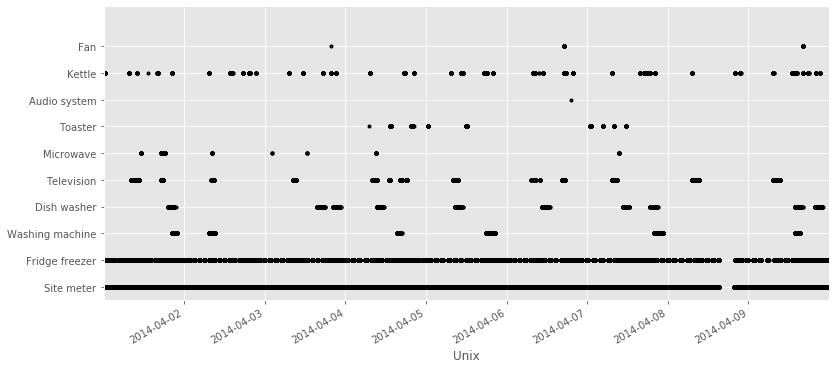

In [5]:
elec.plot_when_on(on_power_threshold = 40)

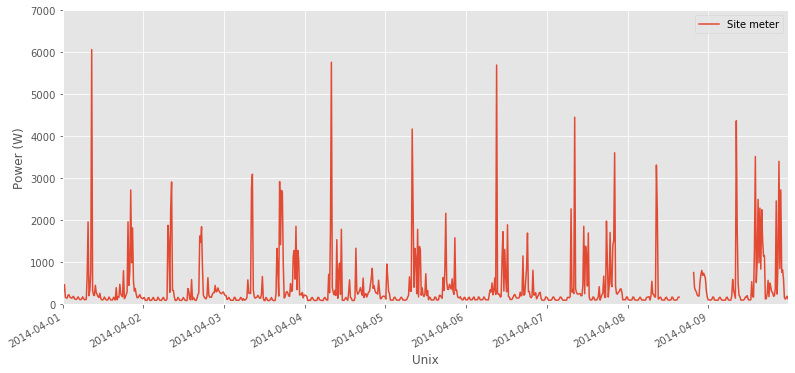

In [6]:
plt.ylim(0,7000)
elec.mains().plot()

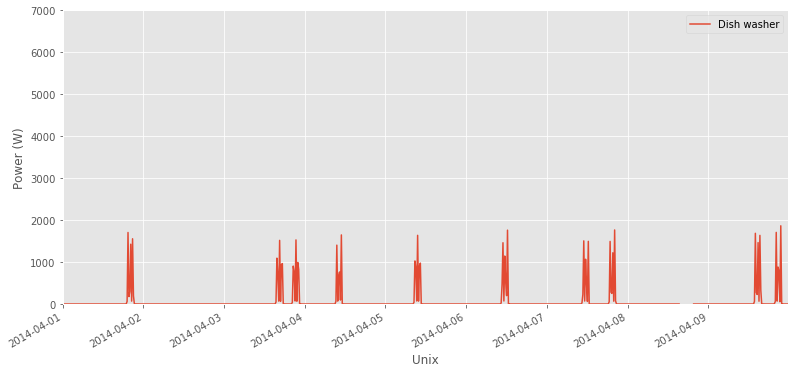

In [7]:
plt.ylim(0,7000)
elec.select_using_appliances(type=["dish washer"],).plot()

In [8]:
agg_df = next(elec.mains().load())
agg_df.columns = ["aggregate"]
agg_df.head()

,aggregate
Unix,
2014-04-01 00:00:02+01:00,140
2014-04-01 00:00:13+01:00,138
2014-04-01 00:00:16+01:00,138
2014-04-01 00:00:20+01:00,138
2014-04-01 00:00:27+01:00,142


In [9]:
app = "dish washer"
app_df = next(elec[app].load())
app_df.columns = [app]
app_df.head()

,dish washer
Unix,
2014-04-01 00:00:02+01:00,0
2014-04-01 00:00:13+01:00,0
2014-04-01 00:00:16+01:00,0
2014-04-01 00:00:20+01:00,0
2014-04-01 00:00:27+01:00,0


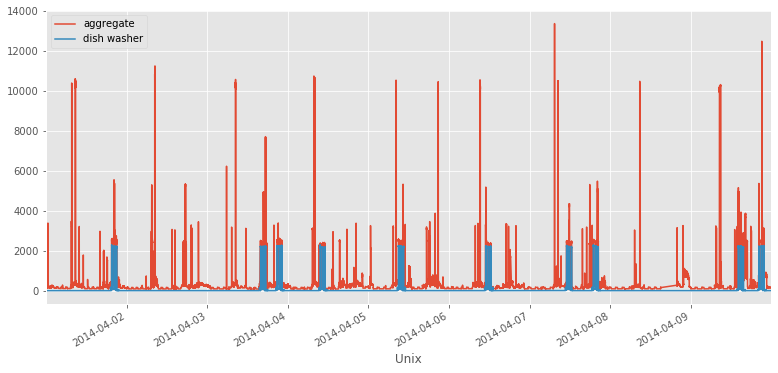

In [10]:
df = agg_df.join([app_df],how="inner")
df.plot()

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  53., 303., 388.,
        423., 225.,   0., 217., 193., 142., 117.,  47., 247., 482., 258.,
         85.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 23 Patch objects>)

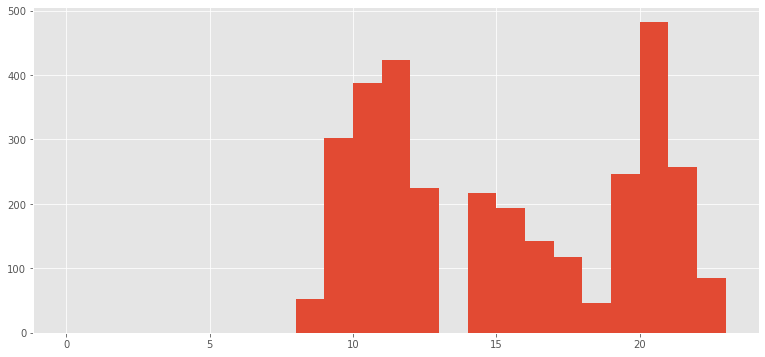

In [18]:
import numpy as np
hours = df[df[app]>2000].index.hour
plt.hist(hours, bins=np.arange(24))